In [16]:
import os
from datetime import datetime
import traceback
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as tf
import torch.utils.data as data
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import torchvision
import numpy as np
from PIL import Image, ImageOps

from tqdm import tqdm
from tensorboardX import SummaryWriter

from dataset import score
from resnet import resnet
from resnet import transforms as aug


In [22]:
# consts

split_name = 'score-1'

cp_result_path = './result/debug_50_score-1_20190531_140203'
cp_filename = '080_0.4574.pth'

root_path = '/home/voyager/data/root/'
val_file = os.path.join(root_path, '{}_val.csv'.format(split_name))

batch_size = 4
num_workers = 2
depth = 50
device_name = 'cuda:1'

image_size = 224
num_classes = 1

# mean = 77.944588
# std = 7.521182
mean = 78.416294
std = 7.549563

cp_path = os.path.join(cp_result_path, cp_filename)


In [23]:
# transforms for val
val_trans = transforms.Compose([
    aug.AutoLevel(),
    aug.AutoContrast(),
    aug.Contrast(contrast=1.2),
    aug.Pad(), # pad to square
    transforms.ToPILImage(),
    transforms.Resize(image_size),
    transforms.ToTensor()
])

val_target_trans = score.ScoreNormalize(mean, std)

val_set = score.ScoreDataset(
    root_path,
    phase='val',
    crop_set='manual_crop',
    transforms=val_trans,
    target_transforms=val_target_trans,
    weight=False
)

val_loader = DataLoader(
    val_set,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=score.collate,
    num_workers=num_workers
)


In [24]:
device = torch.device(device_name)

'''
if depth == 34:
    net = resnet.resnet34(num_classes=num_classes)
elif depth == 50:
    net = resnet.resnet50(num_classes=num_classes)
elif depth == 101:
    net = resnet.resnet101(num_classes=num_classes)
elif depth == 152:
    net = resnet.resnet152(num_classes=num_classes)
'''

# load checkpoint
net = torch.load(cp_path)

net = net.to(device)
net.training = False

net.eval()

criterion = nn.L1Loss()


In [25]:
# ok, eval

eval_losses = []

with tqdm(total=len(val_loader)) as pbar:
    for sample in val_loader:
        imgs, annos = sample
        targets, _ = annos
        
        results = net(imgs.to(device))
        
        loss = criterion(results.squeeze(), targets.to(device))
        
        eval_losses.append(loss.item())
        
        pbar.update(1)

print(np.mean(eval_losses))


100%|██████████| 98/98 [00:04<00:00, 19.99it/s]

0.8921223769382555


target: 102.0, predict: 87.69437282635164


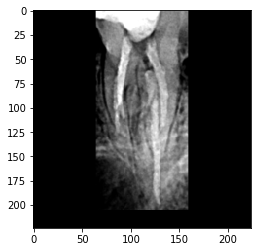

target: 75.0, predict: 67.78483449446308


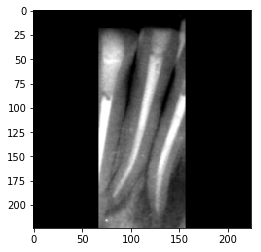

target: 75.0, predict: 78.48093066200788


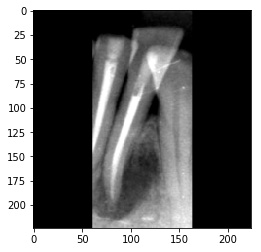

target: 84.0, predict: 64.90237672286773


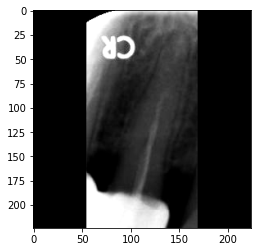

target: 74.0, predict: 69.06207973125898


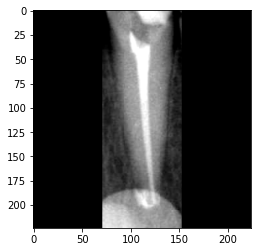

target: 80.0, predict: 77.30980789689242


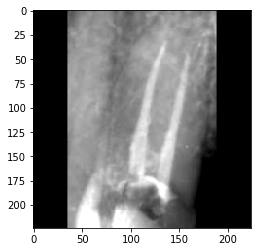

target: 80.0, predict: 83.48716672697705


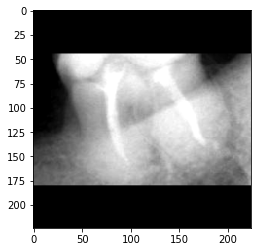

target: 70.0, predict: 69.0481381714158


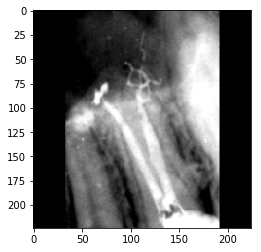

target: 95.0, predict: 83.49405695886391


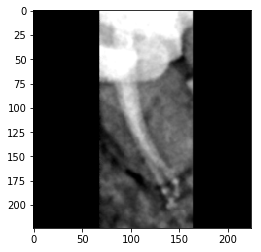

target: 93.0, predict: 84.14843234291386


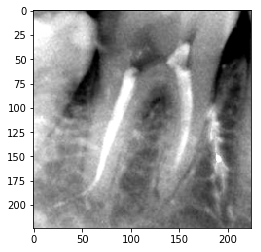

target: 90.0, predict: 79.78468192552701


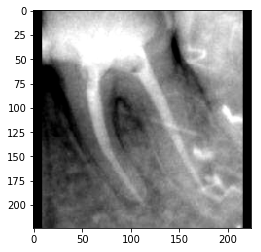

target: 81.0, predict: 85.62953565582484


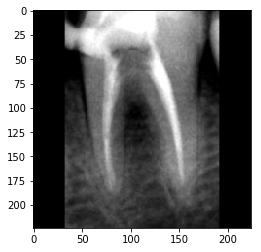

target: 78.0, predict: 69.78967507883237


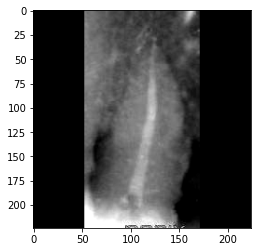

target: 70.0, predict: 69.520681541942


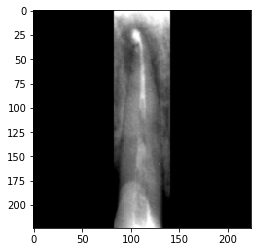

target: 70.0, predict: 68.07986619605445


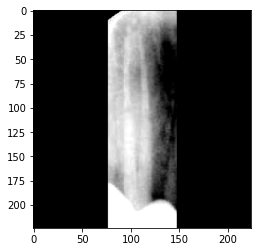

target: 70.0, predict: 66.23269186482358


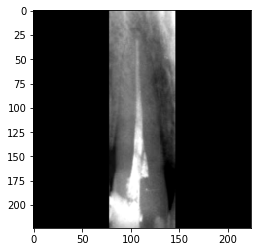

target: 85.0, predict: 92.71499302942811


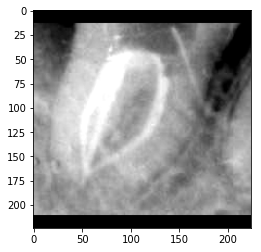

target: 83.0, predict: 79.81461789512637


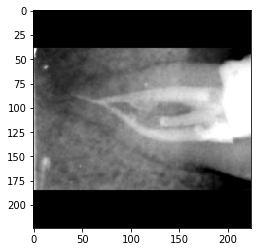

target: 90.0, predict: 78.14565069086201


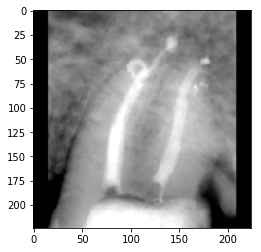

target: 70.0, predict: 71.49848228604995


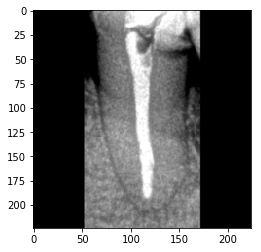

target: 77.0, predict: 76.56124137348978


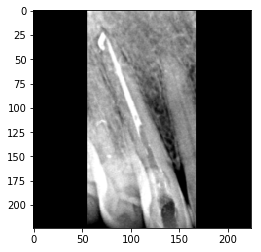

target: 80.0, predict: 85.3728754180172


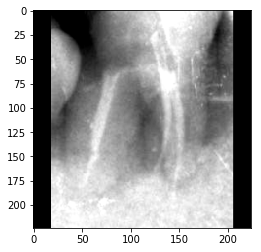

target: 85.0, predict: 88.0055825332197


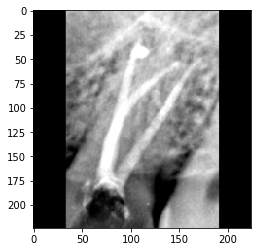

target: 75.0, predict: 82.75441135530185


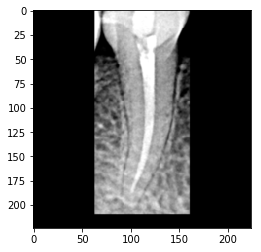

target: 75.0, predict: 66.30653956303107


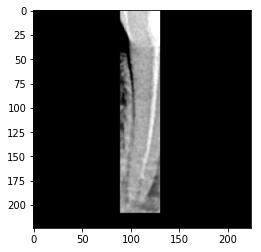

target: 80.0, predict: 74.40298141986334


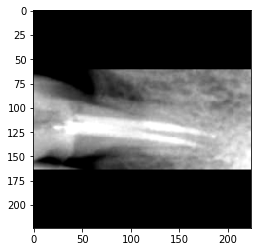

target: 83.0, predict: 89.65948028016018


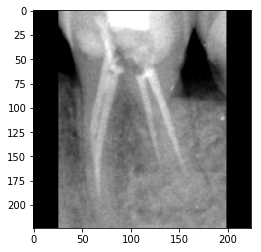

target: 75.0, predict: 68.34043323854088


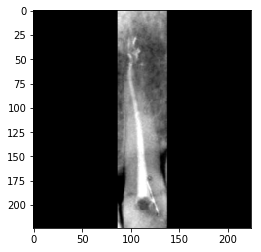

target: 60.0, predict: 81.29712033640035


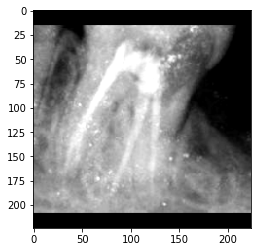

target: 80.0, predict: 85.06669793836903


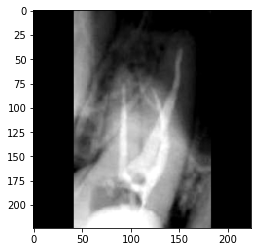

target: 85.0, predict: 73.99849663879174


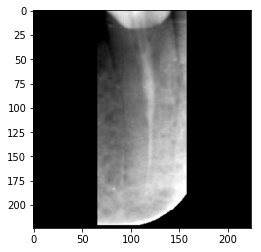

target: 90.0, predict: 71.73496501616381


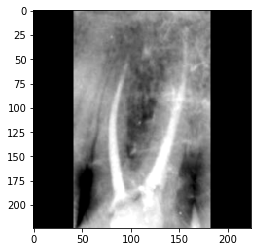

target: 82.0, predict: 64.70081494072592


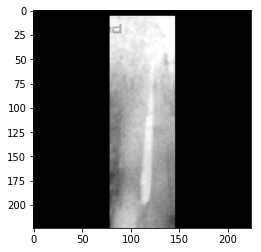

target: 82.0, predict: 71.58995245429098


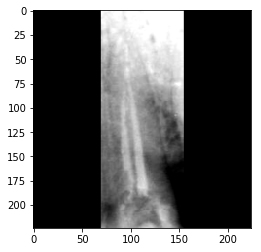

target: 70.0, predict: 66.9561842125051


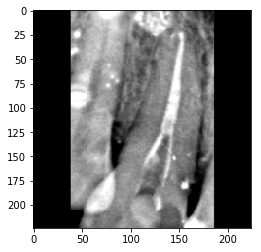

target: 83.0, predict: 85.27074500987285


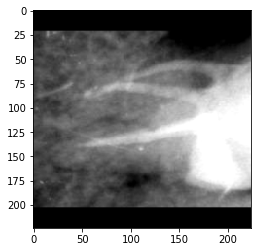

target: 90.0, predict: 72.80144349540794


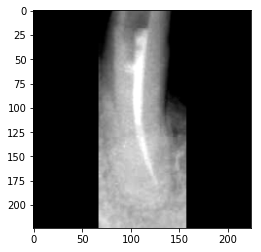

target: 80.0, predict: 85.74623850841957


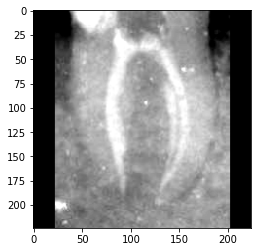

target: 75.0, predict: 88.07542352918577


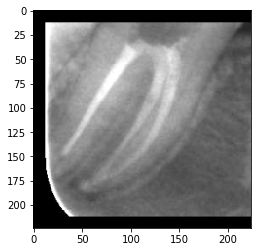

target: 72.0, predict: 68.62755143321203


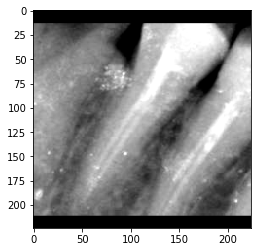

target: 80.0, predict: 70.52160382067632


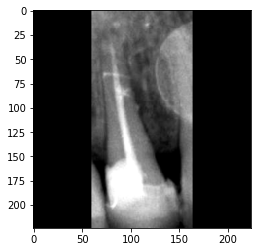

target: 75.0, predict: 91.8772988681296


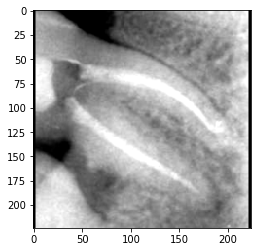

target: 77.0, predict: 72.8994272547254


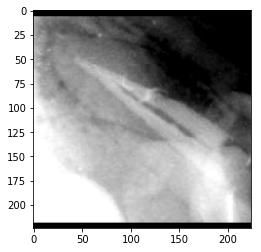

target: 75.0, predict: 77.16608579103405


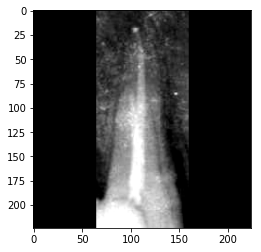

target: 72.0, predict: 66.12327523445403


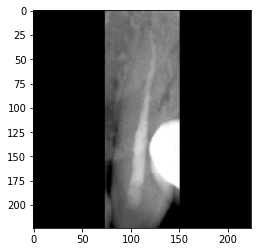

target: 70.0, predict: 71.42449644121307


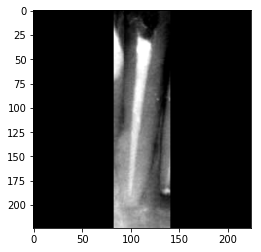

target: 75.0, predict: 75.01044297355273


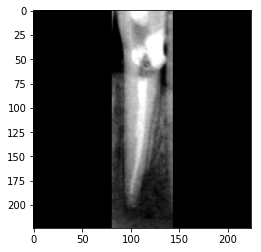

target: 75.0, predict: 77.8512895291603


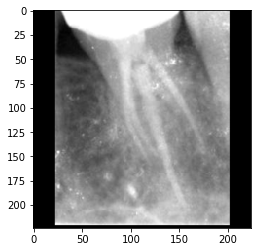

target: 80.0, predict: 76.14055282527005


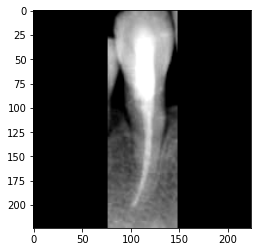

target: 80.0, predict: 73.27305133875983


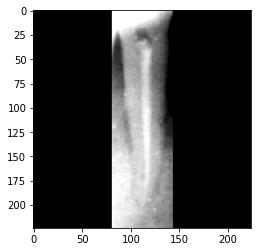

target: 84.0, predict: 78.70698831366826


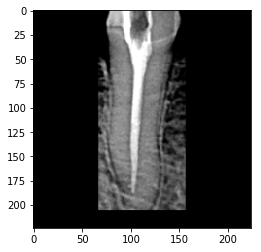

target: 75.0, predict: 73.81613723813557


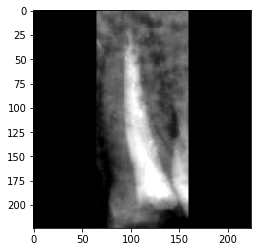

target: 75.0, predict: 77.0755938989243


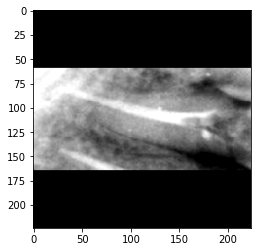

target: 75.0, predict: 71.15566670032626


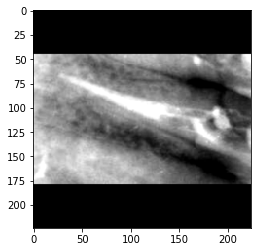

target: 75.0, predict: 67.82081651654624


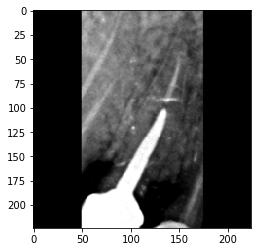

target: 75.0, predict: 67.4420364583112


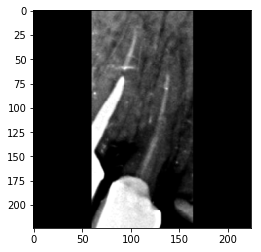

target: 80.0, predict: 80.90521162348824


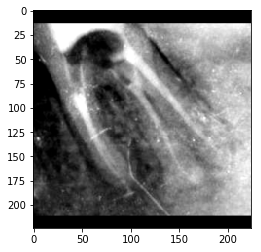

target: 85.0, predict: 87.48285278717898


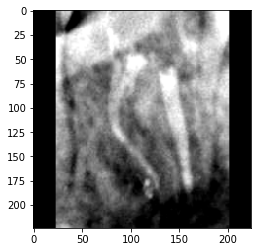

target: 76.0, predict: 76.03998905390169


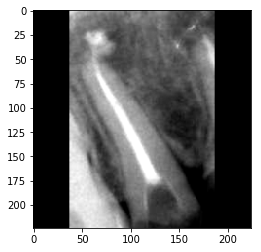

target: 77.0, predict: 73.79426462180035


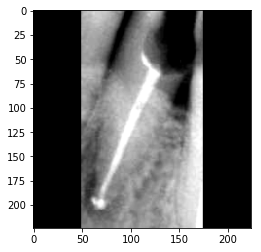

target: 75.0, predict: 79.70775315249394


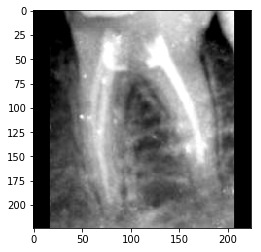

target: 80.0, predict: 83.13791809821164


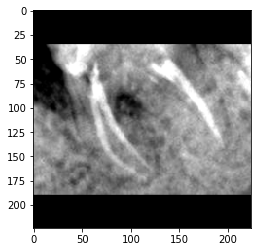

target: 78.0, predict: 95.65917309507584


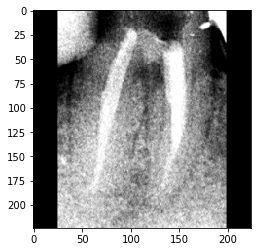

target: 75.0, predict: 77.23206014384144


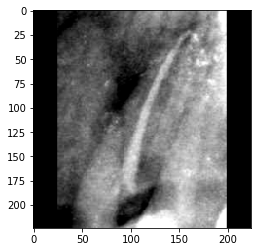

target: 80.0, predict: 84.95448147631191


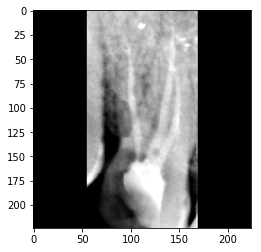

target: 83.0, predict: 86.82629360641097


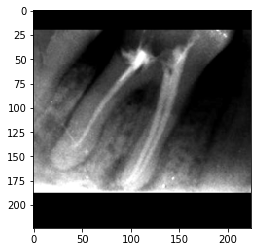

target: 90.0, predict: 71.55014282559668


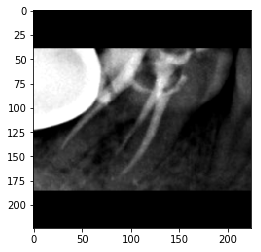

target: 70.0, predict: 71.61437920830839


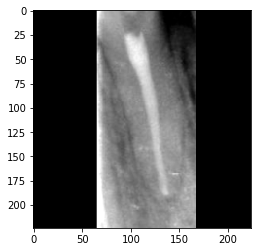

target: 83.0, predict: 75.33072468407511


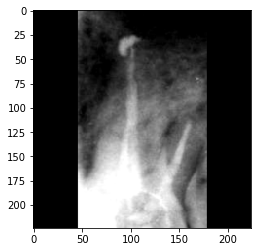

target: 84.0, predict: 79.14617754174428


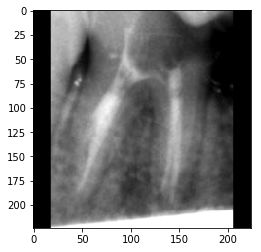

target: 77.0, predict: 75.34409115794968


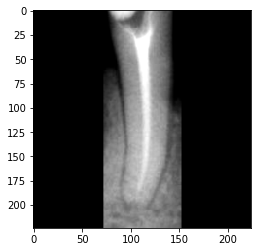

target: 76.0, predict: 72.77079384322154


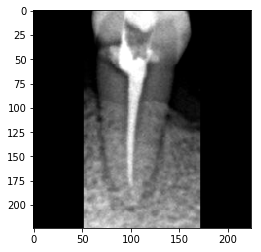

target: 73.0, predict: 70.05511730237042


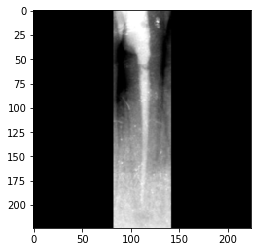

target: 78.0, predict: 67.58044498131441


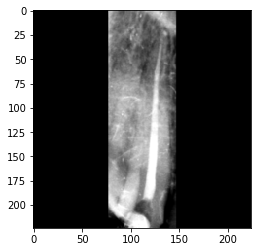

target: 75.0, predict: 68.05355893791901


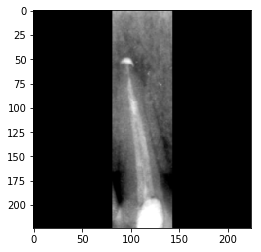

target: 70.0, predict: 69.07012373499524


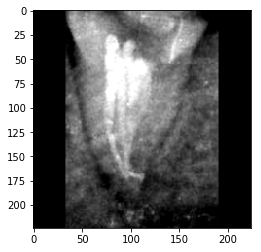

target: 74.0, predict: 73.10588086751258


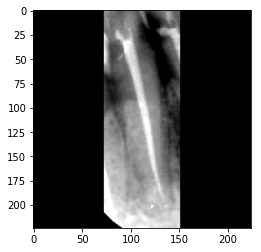

target: 80.0, predict: 79.08289631697791


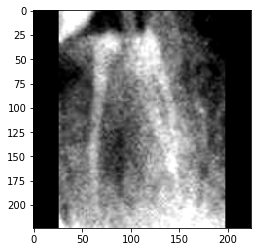

target: 90.0, predict: 91.16396097269201


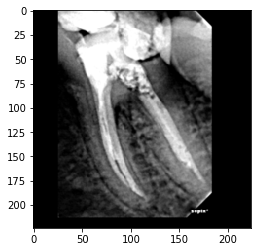

target: 85.0, predict: 68.8173811016029


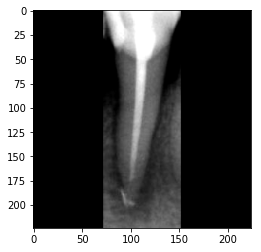

target: 95.0, predict: 86.29656383116233


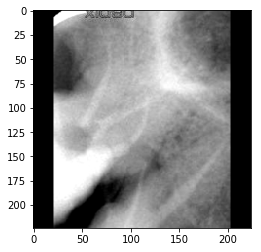

target: 82.0, predict: 83.71497996861571


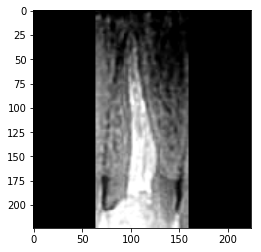

target: 85.0, predict: 91.1100837872287


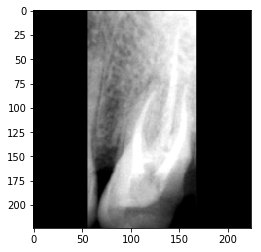

target: 80.0, predict: 78.78216873873387


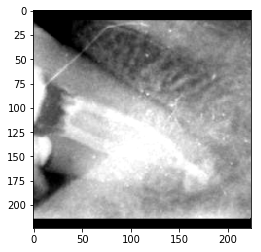

target: 80.0, predict: 94.61174085112714


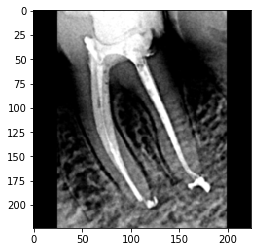

target: 75.0, predict: 67.47074665781784


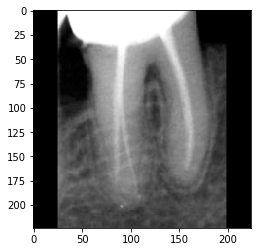

target: 80.0, predict: 85.11792603846675


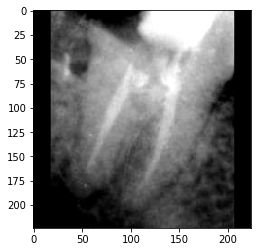

target: 80.0, predict: 69.7003450583744


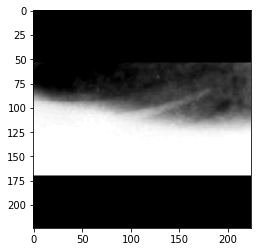

target: 80.0, predict: 78.48352342843509


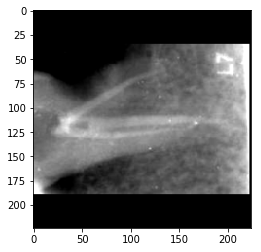

target: 85.0, predict: 88.41329958542788


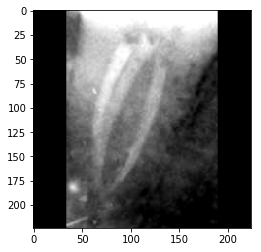

target: 60.0, predict: 82.45305865793496


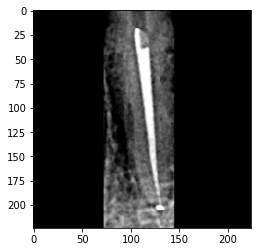

target: 68.0, predict: 72.7601439530657


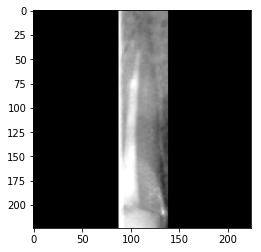

target: 68.0, predict: 64.94159236605452


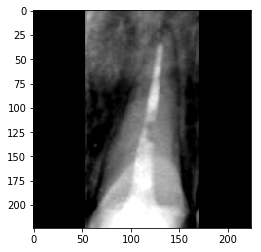

target: 85.0, predict: 87.44229887664424


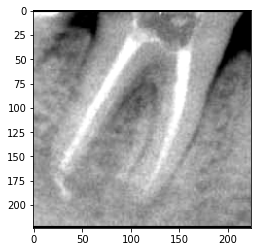

target: 70.0, predict: 75.48966643109306


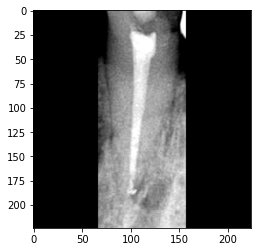

target: 75.0, predict: 82.83399236362368


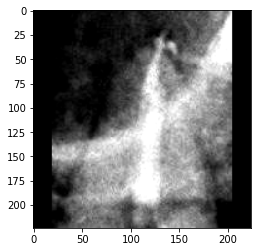

target: 70.0, predict: 75.08448506701723


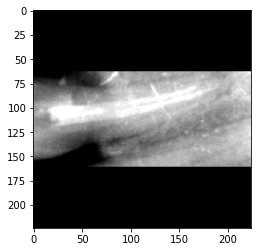

target: 93.0, predict: 72.09971351675152


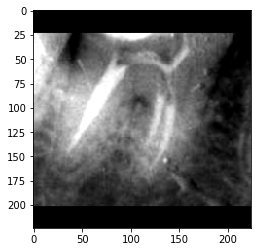

target: 70.0, predict: 68.48155699529576


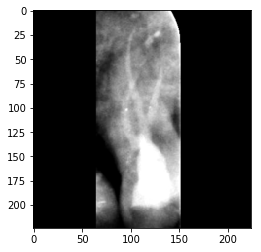

target: 75.0, predict: 74.10194146486592


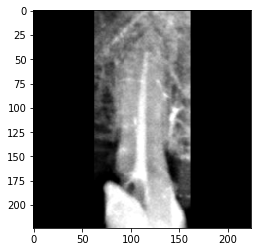

In [26]:
# show some results

def get_score(data, mean, std):
    score = data * std + mean
    
    return score

def show_result(index):
    sample = val_set[index]
    img, anno = sample
    target, _ = anno
    target = get_score(target, mean, std)

    result = net(img.expand(1, -1, -1, -1).to(device))
    result = get_score(result.item(), mean, std)

    print('target: {}, predict: {}'.format(target, result))
    
    plt.imshow(img.numpy().transpose((1, 2, 0)))
    plt.show()

for i in range(100):
    show_result(i)
